# Similarities between "Thinking Out Loud" and "Let's Get It On"
- Ray Shen
- Applied Times Series Analysis Final Project
- May 11, 2021

## Introduction



### Why is Ed Sheeran facing a lawsuit?
In the lawsuit document (2018) filed by Structured Asset Sales, LLC, (“SAS”) against Ed Sheeran, the company claims that " 'Thinking Out Loud' (by Ed Sheeran) copies various elements of 'Let's Get it On,' (by Marvin Gaye) including but not limited to the melody, rhythms, harmonies, drums, bass line, backing chorus, tempo, syncopation and looping." 



### Music Plagerism from a Musician's Perspective
Adam Neely (2018) points out in one of his YouTube videos that the only actual similarities between the two songs are the bass line and the drum composition. He then proceeds to explain from a musician's prospective that the use of chord progressions and rhythms cannot be copyrighted. Further, he noted that the claim regarding similarities between melodic structures of the two songs is invalid because they are practically different. 

### Focus of the Project
In this project, we will compare the frequency domains of the two songs through three 30-second clips taken from the beginning, middle, and end of the songs. We downloaded the songs through Qoret website for free. However, we recommand anyone who would like to listen to the songs go to YouTube, Spotify, or other authorized platforms. The results of the analysis will not contribute to the arguments regarding plagerism. Instead, we only aim to examine the similarities in the frequency domains of two time series originated from audio files. 

## Methods

### Setting Up and Loading Time Series

Installing the packages

In [1]:
install.packages("tuneR", dependencies = TRUE)
install.packages("tswge")
library("tuneR")
library(tswge)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading the audio clips in mp3 format to Google Colab and print tables of summarized statistics of each clip

In [2]:
#Thinking Out Loud (TOL)
TOL_P1 <- readMP3("/content/t1.mp3")
TOL_P2 <- readMP3("/content/t2.mp3")
TOL_P3 <- readMP3("/content/t3.mp3")
str(TOL_P1)
str(TOL_P2)
str(TOL_P3)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:1339776] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:1339776] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE
Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:1320192] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:1320192] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE
Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:1329408] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:1329408] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [3]:
# Let's Get It On (LGIO)
LGIO_P1 <- readMP3("/content/l1.mp3")
LGIO_P2 <- readMP3("/content/l2.mp3")
LGIO_P3 <- readMP3("/content/l3.mp3")
str(LGIO_P1)
str(LGIO_P2)
str(LGIO_P3)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:1316736] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:1316736] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE
Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:1336320] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:1336320] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE
Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:1336320] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:1336320] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


We then separate the left channel and convert the amplitude to values between -1 and 1. 

In [4]:
t1 <- TOL_P1@left
mt1 <- t1 / 2^(TOL_P1@bit - 1)
t2 <- TOL_P2@left
mt2 <- t2 / 2^(TOL_P2@bit - 1)
t3 <- TOL_P3@left
mt3 <- t3 / 2^(TOL_P3@bit - 1)
l1 <- LGIO_P1@left
ml1 <- l1 / 2^(LGIO_P1@bit - 1)
l2 <- LGIO_P2@left
ml2 <- l2 / 2^(LGIO_P2@bit - 1)
l3 <- LGIO_P3@left
ml3 <- l3 / 2^(LGIO_P3@bit - 1)

In [5]:
#Creating the number of samples variables for later use
t1_samples <- length(TOL_P1@left)
t2_samples <- length(TOL_P2@left)
t3_samples <- length(TOL_P3@left)
l1_samples <- length(LGIO_P1@left)
l2_samples <- length(LGIO_P2@left)
l3_samples <- length(LGIO_P3@left)


In [6]:
#Creating time variables for later use
t1_time <- (0:(t1_samples - 1)) / TOL_P1@samp.rate
t2_time <- (0:(t2_samples - 1)) / TOL_P2@samp.rate
t3_time <- (0:(t3_samples - 1)) / TOL_P3@samp.rate
l1_time <- (0:(l1_samples - 1)) / LGIO_P1@samp.rate
l2_time <- (0:(l2_samples - 1)) / LGIO_P2@samp.rate
l3_time <- (0:(l3_samples - 1)) / LGIO_P3@samp.rate


### "Thinking Out Loud" and "Let's Get It On" Beginning Comparison

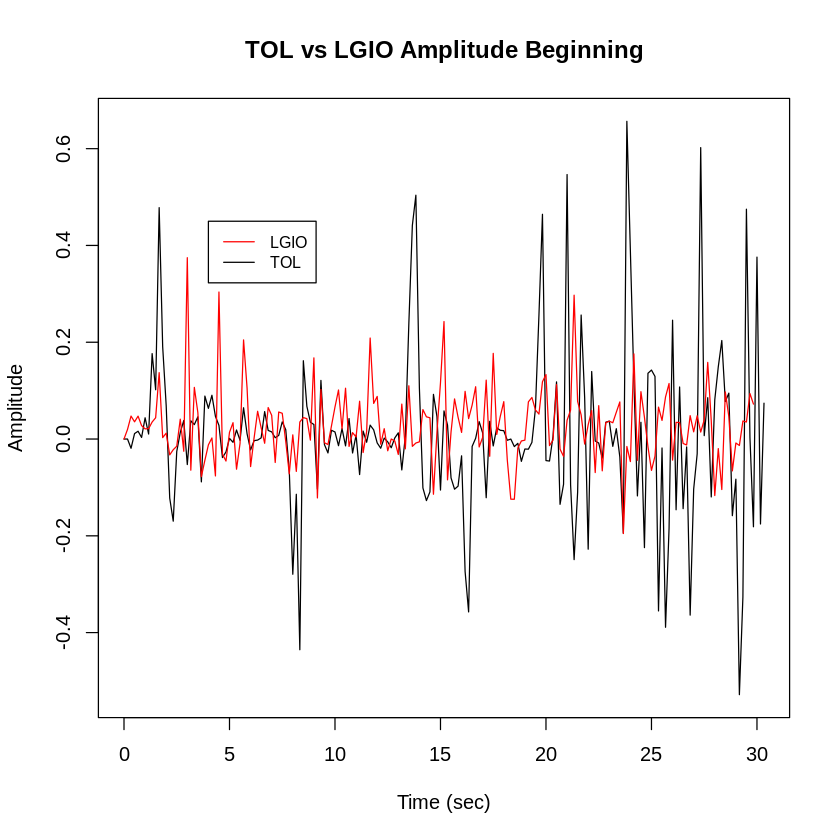

In [7]:
#Resampling TOL and LGIO Beginning at 1/6 sampling rate
t1_i <- seq(1, (t1_samples - 1), 7350)
l1_i <- seq(1, (l1_samples - 1), 7350)
#Plotting the realizations of the two time series together for comparison
plot(t1_time[t1_i], mt1[t1_i], type='l', col='black', xlab='Time (sec)', ylab='Amplitude',main='TOL vs LGIO Amplitude Beginning')
lines(l1_time[l1_i], ml1[l1_i], type='l', col='red')
legend(4,0.45,legend=c("LGIO", "TOL"),
       col=c("red", "black"), lty=1:1, cex=0.8)

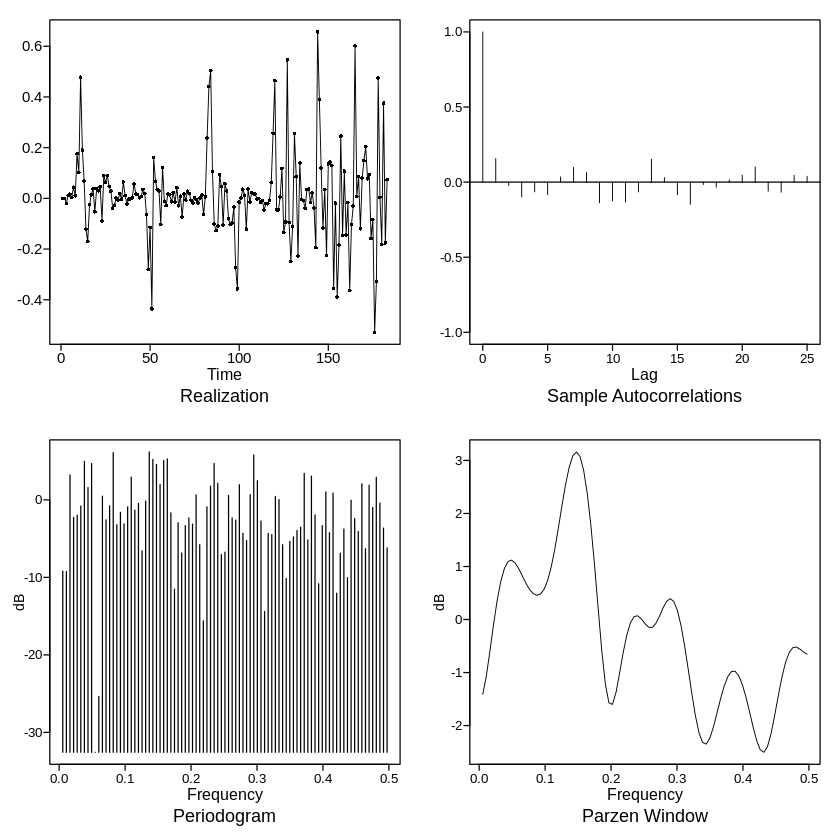

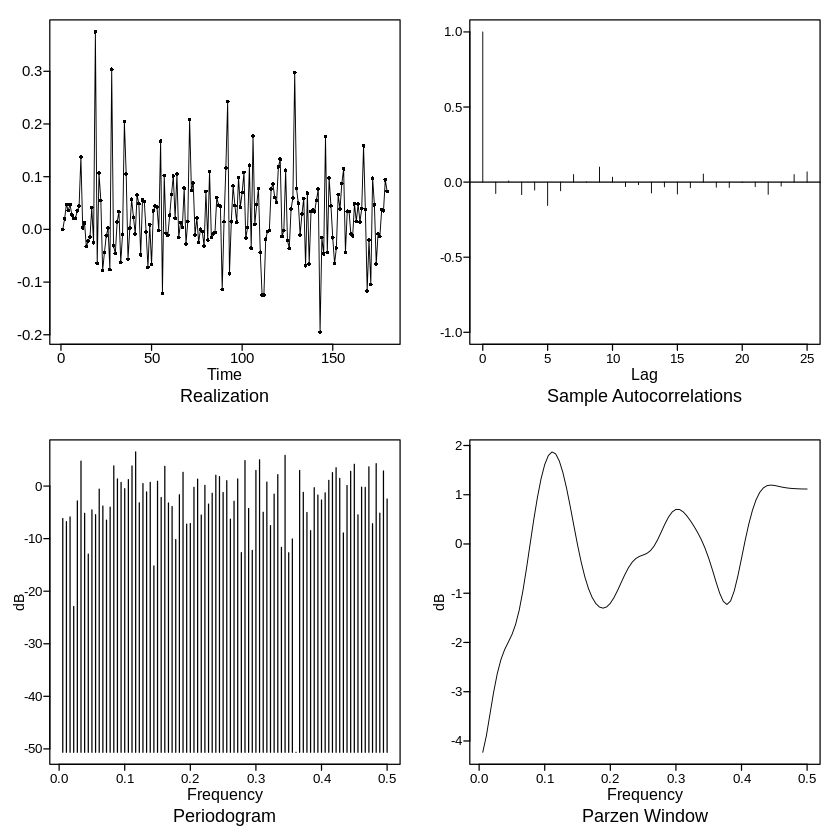

In [8]:
# Plotting the sample time series for TOL and LGIO beginning
t1_plot<-plotts.sample.wge(mt1[t1_i])
l1_plot<-plotts.sample.wge(ml1[l1_i])

In [9]:
#Creating Spectrum of TOL and LGIO Beginning
t1_sp<-spectrum(mt1[t1_i], log="dB",plot=FALSE)
l1_sp<-spectrum(ml1[l1_i], log="dB",plot=FALSE)

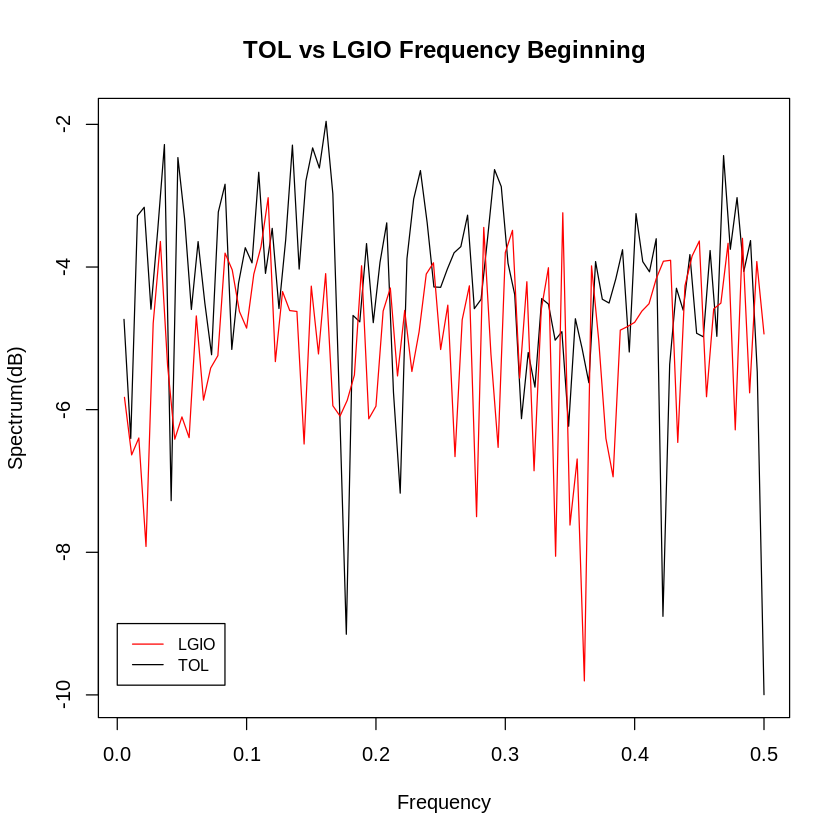

In [10]:
#Plotting the two spectrums together for comparison.
plot(t1_sp$freq,log(t1_sp$spec),type='l',col='black',ylab='Spectrum(dB)',xlab='Frequency',main='TOL vs LGIO Frequency Beginning')
lines(l1_sp$freq,log(l1_sp$spec)+0.5,col='red')
legend(0,-9,legend=c("LGIO", "TOL"),
       col=c("red", "black"), lty=1:1, cex=0.8)

### "Thinking Out Loud" and "Let's Get It On" Middle Comparison

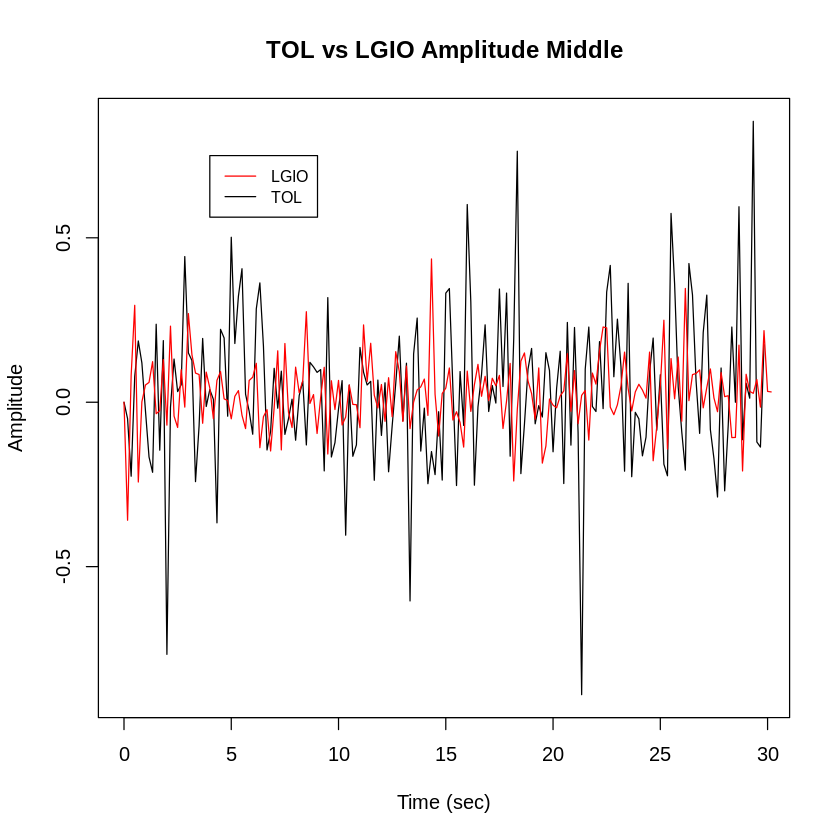

In [11]:
#Resampling TOL and LGIO Middle at 1/6 sampling rate
t2_i <- seq(1, (t2_samples - 1), 7350)
l2_i <- seq(1, (l2_samples - 1), 7350)
#Plotting the realizations of the two time series together for comparison
plot(t2_time[t2_i], mt2[t2_i], type='l', col='black', xlab='Time (sec)', ylab='Amplitude',main='TOL vs LGIO Amplitude Middle')
lines(l2_time[l2_i], ml2[l2_i], type='l', col='red')
legend(4,0.75,legend=c("LGIO", "TOL"),
       col=c("red", "black"), lty=1:1, cex=0.8)

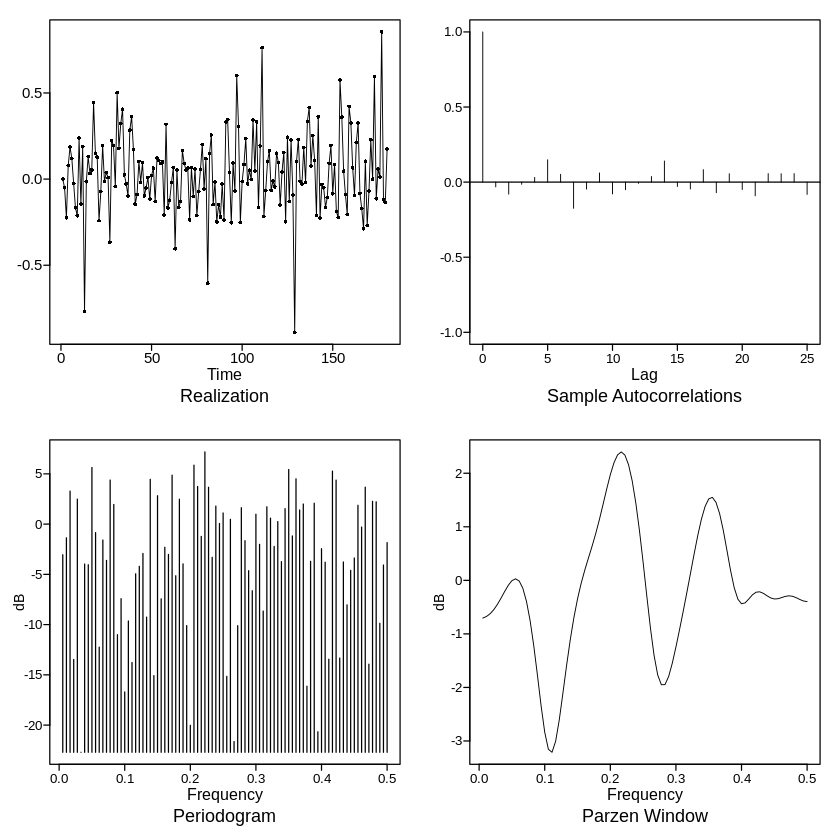

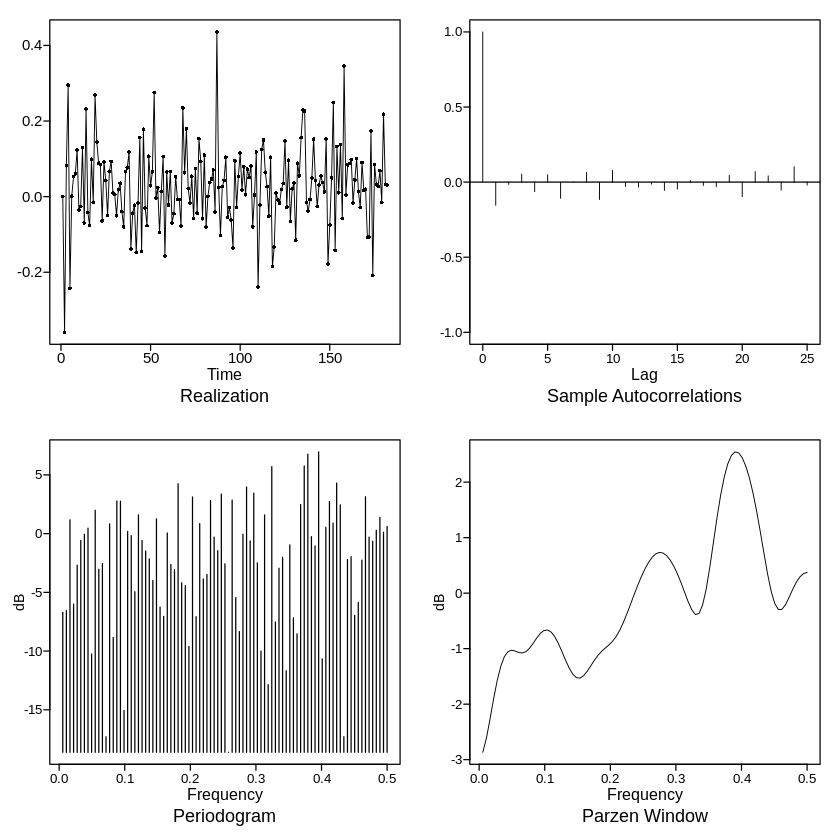

In [12]:
# Plotting the sample time series for TOL and LGIO middle
t2_plot<-plotts.sample.wge(mt2[t2_i])
l2_plot<-plotts.sample.wge(ml2[l2_i])

In [13]:
#Spectrum of TOL and LGIO Middle
t2_sp<-spectrum(mt2[t2_i], log="dB",plot=FALSE)
l2_sp<-spectrum(ml2[l2_i], log="dB",plot=FALSE)

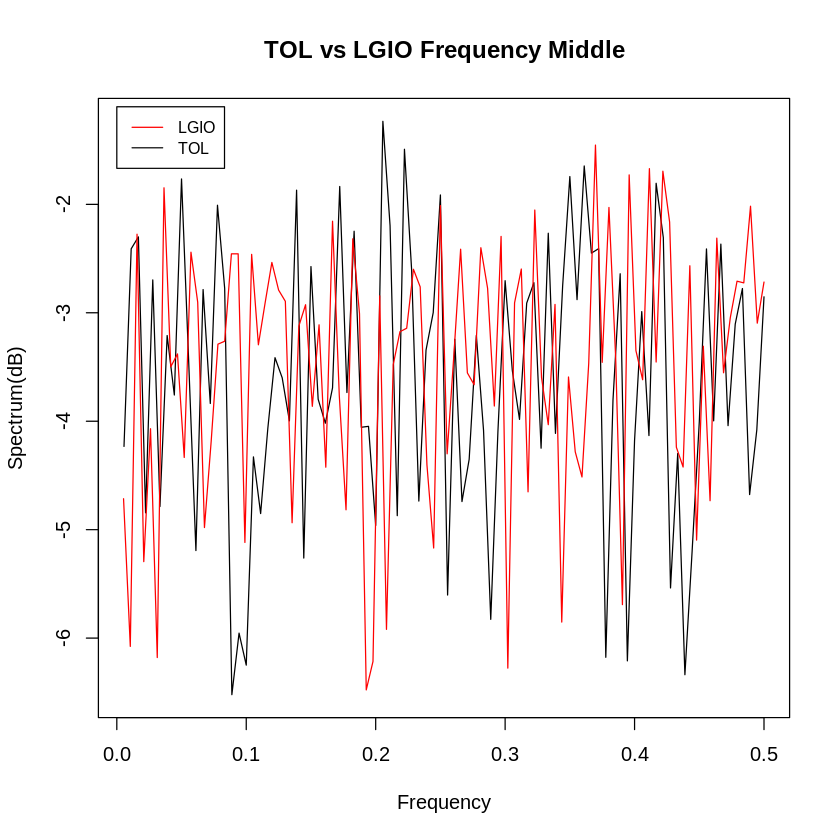

In [14]:
#Plotting the two spectrums together for comparison.
plot(t2_sp$freq,log(t2_sp$spec),type='l',col='black',ylab='Spectrum(dB)',xlab='Frequency',main='TOL vs LGIO Frequency Middle')
lines(l2_sp$freq,log(l2_sp$spec)+1.6,col='red')
legend(0,-1.1,legend=c("LGIO", "TOL"),
       col=c("red", "black"), lty=1:1, cex=0.8)

### "Thinking Out Loud" and "Let's Get It On" End Comparison

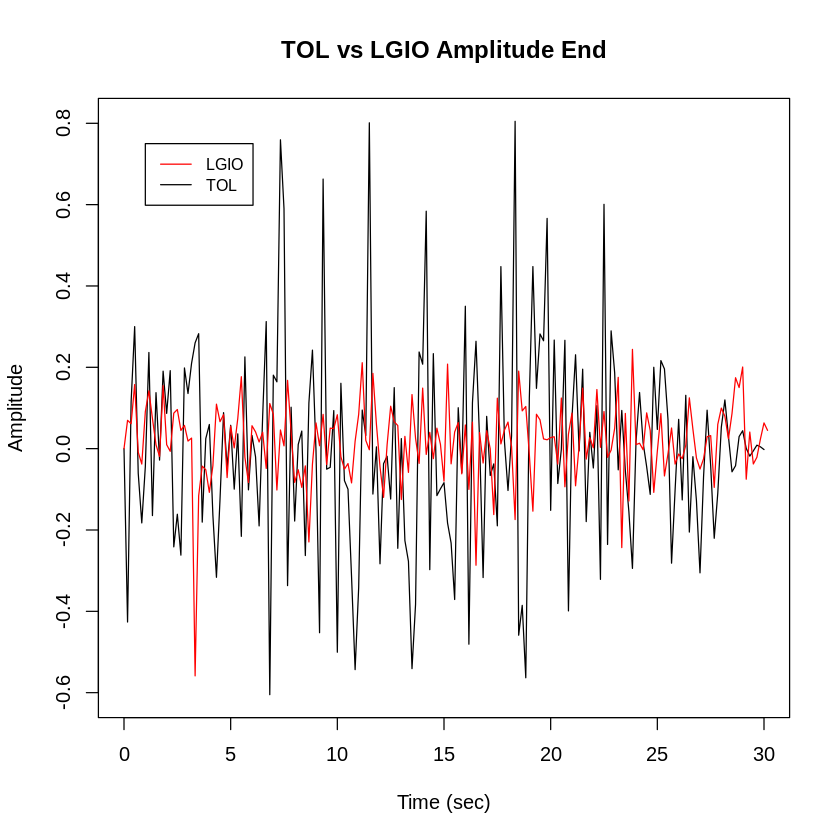

In [15]:
#Resampling TOL and LGIO End at 1/6 sampling rate
t3_i <- seq(1, (t3_samples - 1), 7350)
l3_i <- seq(1, (l3_samples - 1), 7350)
#Plotting the realizations of the two time series together for comparison
plot(t3_time[t3_i], mt3[t3_i], type='l', col='black', xlab='Time (sec)', ylab='Amplitude',main='TOL vs LGIO Amplitude End')
lines(l3_time[l3_i], ml3[l3_i], type='l', col='red')
legend(1,0.75,legend=c("LGIO", "TOL"),
       col=c("red", "black"), lty=1:1, cex=0.8)

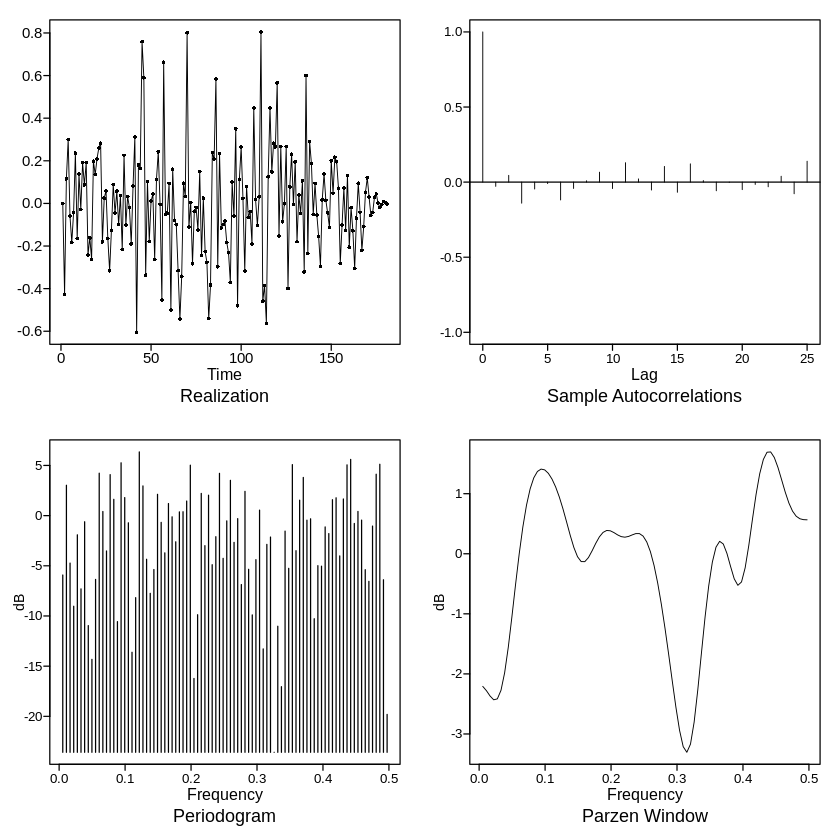

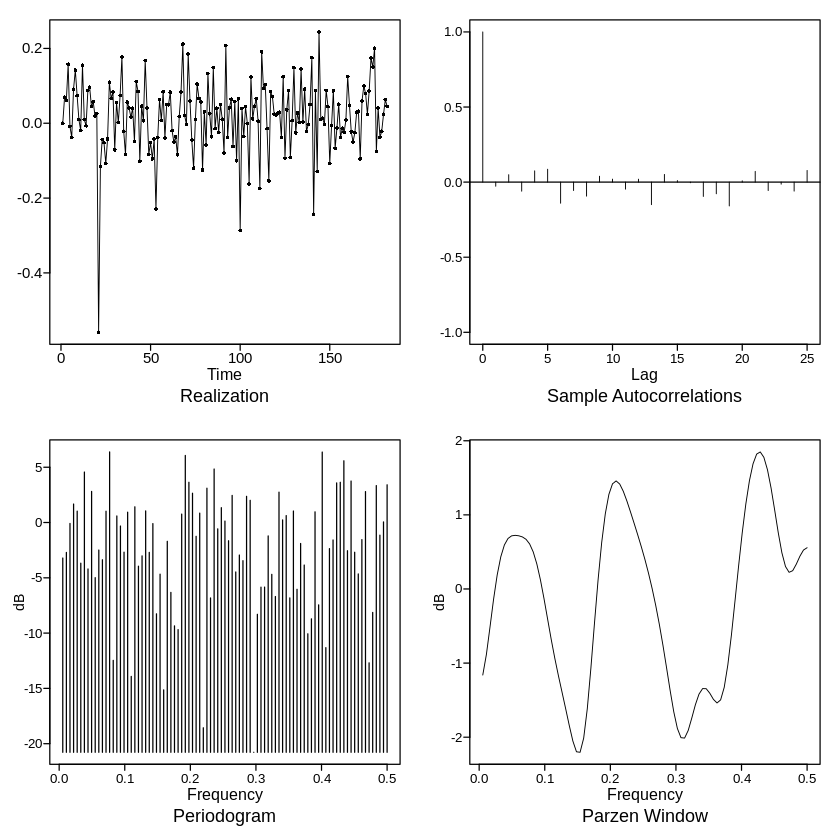

In [16]:
# Plotting the sample time series for TOL and LGIO end
t3_plot<-plotts.sample.wge(mt3[t3_i])
l3_plot<-plotts.sample.wge(ml3[l3_i])

In [17]:
#Spectrum of TOL and LGIO End
t3_sp<-spectrum(mt3[t3_i], log="dB",plot=FALSE)
l3_sp<-spectrum(ml3[l3_i], log="dB",plot=FALSE)

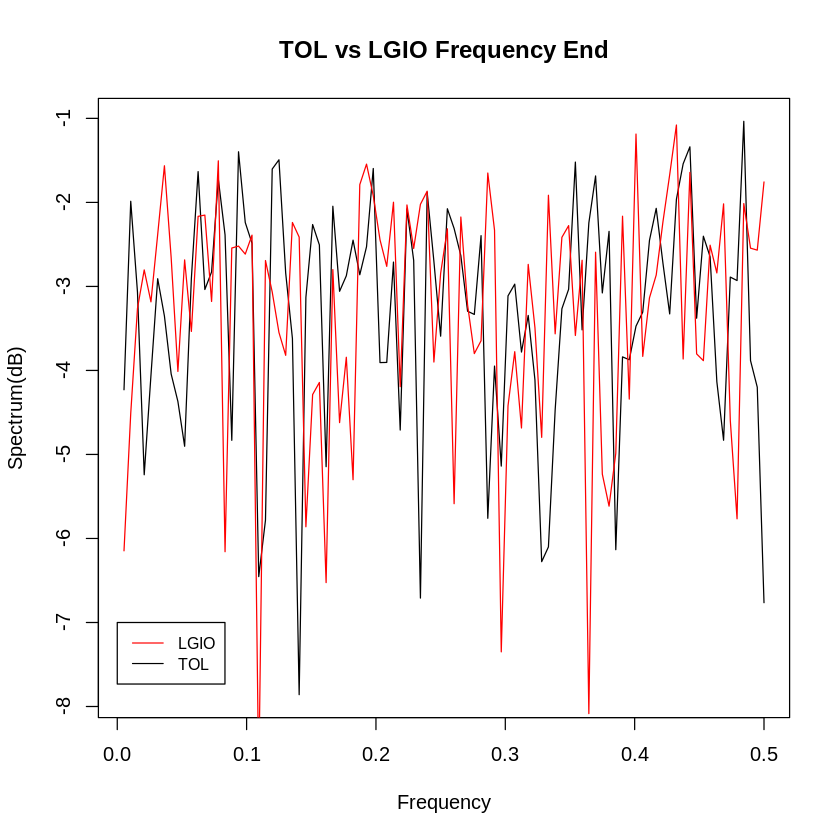

In [18]:
#Plotting the two spectrums together for comparison.
plot(t3_sp$freq,log(t3_sp$spec),type='l',col='black',ylab='Spectrum(dB)',xlab='Frequency',main='TOL vs LGIO Frequency End')
lines(l3_sp$freq,log(l3_sp$spec)+2,col='red')
legend(0,-7,legend=c("LGIO", "TOL"),
       col=c("red", "black"), lty=1:1, cex=0.8)

### "Thinking Out Loud" and "Let's Get It On" End Filtered Comparison

We see an overlap in dominant frequency between 0.4 and 0.5 in the Parzen Window plots for TOL and LGIO End. We decide to apply a low-pass filter with a cutoff at 0.4 to both time series.

In [19]:
#Filtering out frequencies above 0.4 for TOL and LGIO end
mt3_filtered<-butterworth.wge(mt3[t3_i],order=10,type="low",cutoff=0.4,plot=FALSE)$x.filt
ml3_filtered<-butterworth.wge(ml3[l3_i],order=10,type="low",cutoff=0.4,plot=FALSE)$x.filt

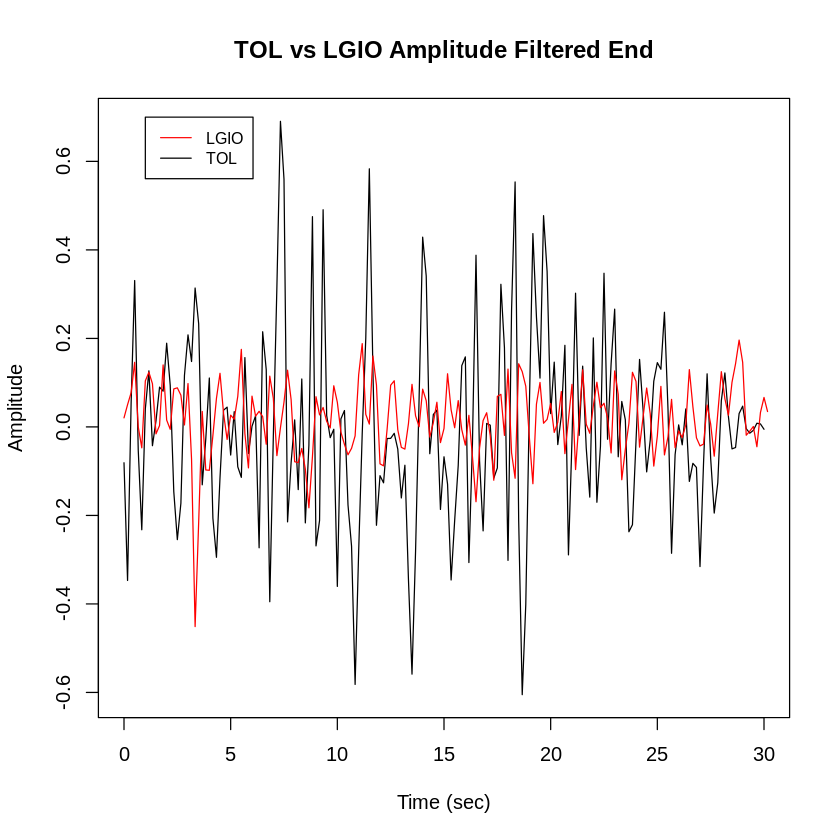

In [20]:
#Plotting the realizations of the two time series together for comparison
plot(t3_time[t3_i], mt3_filtered, type='l', col='black', xlab='Time (sec)', ylab='Amplitude',main='TOL vs LGIO Amplitude Filtered End')
lines(l3_time[l3_i], ml3_filtered, type='l', col='red')
legend(1,0.7,legend=c("LGIO", "TOL"),
       col=c("red", "black"), lty=1:1, cex=0.8)

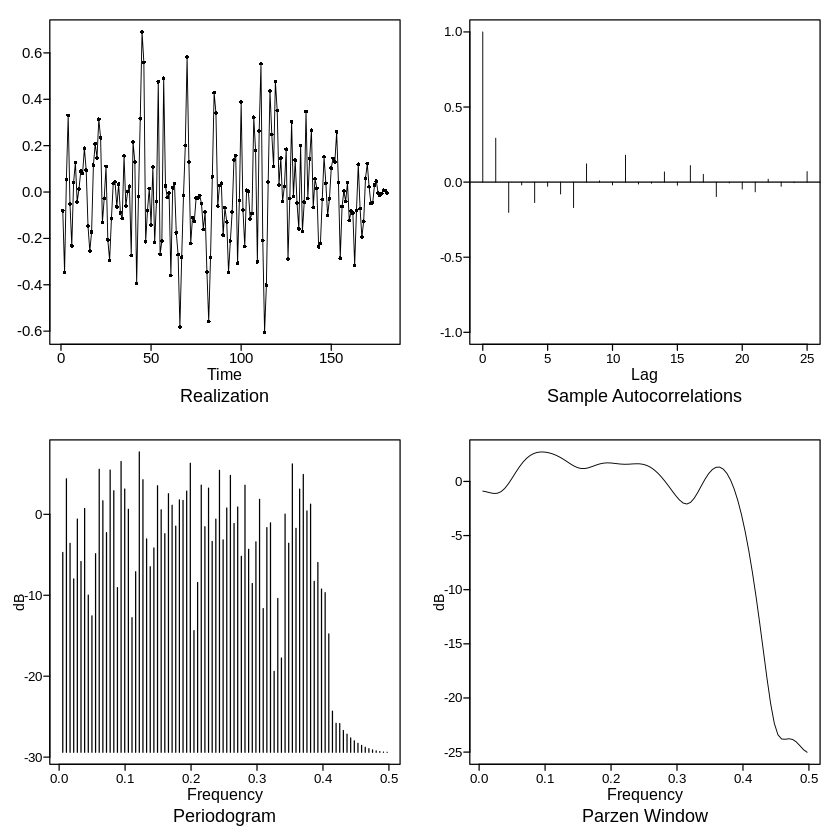

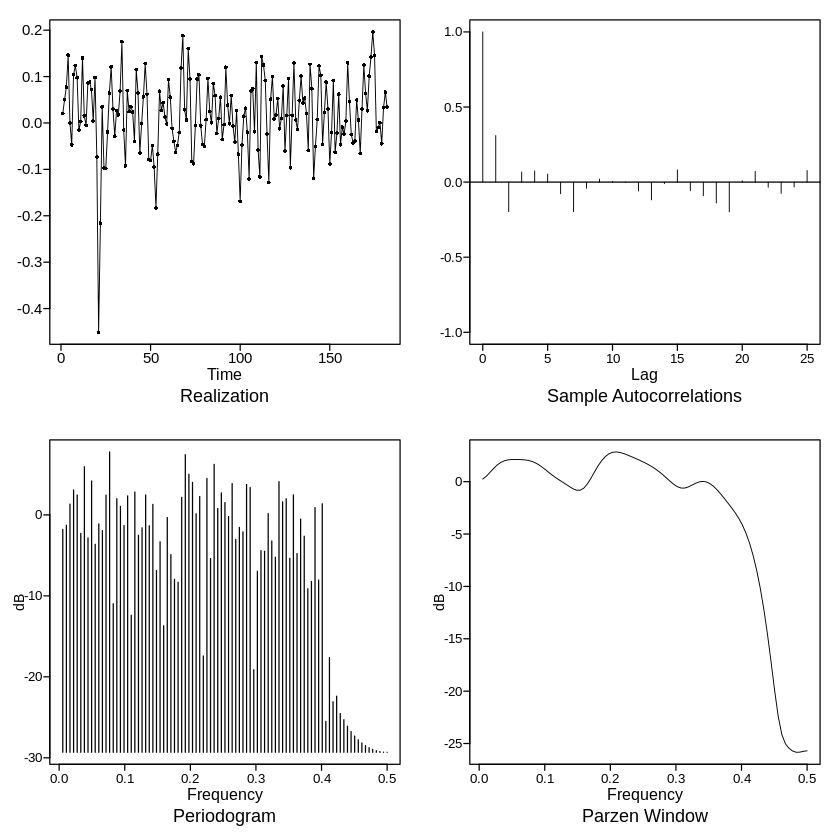

In [21]:
# Plotting the sample time series for TOL and LGIO end filtered
t3_filtered_plot<-plotts.sample.wge(mt3_filtered)
l3_filtered_plot<-plotts.sample.wge(ml3_filtered)

In [22]:
t3_filtered_sp<-spectrum(mt3_filtered, log="dB",plot=FALSE)
l3_filtered_sp<-spectrum(ml3_filtered, log="dB",plot=FALSE)

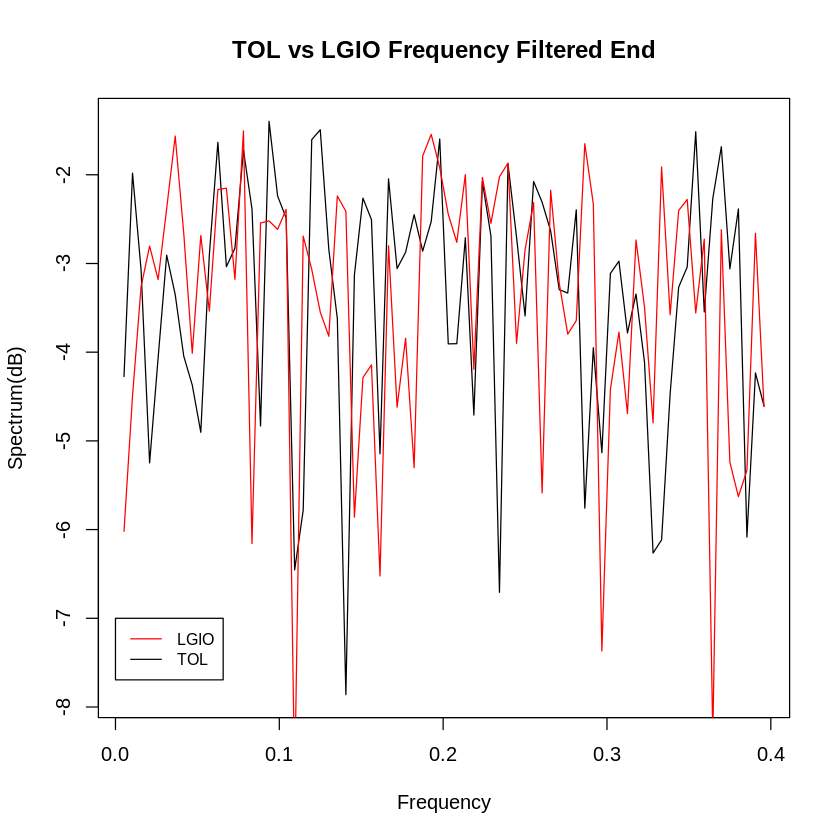

In [23]:
#Plotting the two spectrums with frequencies less than 0.4 together for comparison.
plot(t3_filtered_sp$freq[1:76],log(t3_filtered_sp$spec[1:76]),type='l',col='black',ylab='Spectrum(dB)',xlab='Frequency',main='TOL vs LGIO Frequency Filtered End')
lines(l3_filtered_sp$freq[1:76],log(l3_filtered_sp$spec[1:76])+2,col='red')
legend(0,-7,legend=c("LGIO", "TOL"),
       col=c("red", "black"), lty=1:1, cex=0.8)

## Results

In the comparisons in terms of amplitude, spectrum, and Parzen Window plots for both songs, the beginning and middle part do not show any similarities. They do not share the same dominant frequencies nor have similar patterns shown by the plots. However, we see that the dominant frequencies of both songs' end clips fall into the 0.4 to 0.5 frequency range. Thus, we decide to apply a low-pass filter with a cutoff at 0.4 to see if the similarity remains after the process. The plots in the "Methods" section are our results, but we decide to leave them in "Methods" section for readers' better understanding.

## Discussions

From the sample autocorrelation, frequency, amplitude, and Panzer Window plots, we could not find any visual similarities between the beginning and the middle clips. The dominant frequencies are all different and the plots show different patterns. However, as we mentioned in the "Results" section, the dominant frequency for the end clips of the two songs are both between 0.4 and 0.5. So, we apply a low-pass filter to see if the similarity remains after filtering out the dominant frequency. 

After applying the filter, the amplitude and frequency plots do not show any similarities, but the Panzer Window plots of the filtered frequencies shows similar patterns, though the dominant frequencies are different.

From the lawsuit's description of the use of "bass line and drum composition," we would expect the middle clip to be similar. Contrary to our expectation, the end clips show similarities. This may be because the end clips contain most of the elements in the verse sections of two songs, and these elements contain "bass line and drum composition" mentioned in the lawsuit.

## Conclusions

In this project, we examine the similarities between "Thinking Out Loud," by Ed Sheeran, and "Let's Get It On," by Marvin Gaye, in terms of the frequency domaines. We take three clips from the beginning, middle, and end of both songs and convert the amplitude values of the left channel to six time series with a range of -1 to 1. We then resample the time series by 1/6 of the original sampling rate to reduce the processing time. Then, we create the amplitude, sample time series, and frequency plots for each pair of the time series. For each frequency plot, we add a number to the frequency values of "Let's Get It On" for a better comparison effect. The numbers added are not meaningful and exist only for a more direct comparison. Finally, we repeat the previous steps for the filtered time series of the end clips of the two songs. After the analysis, we have not found any significant similarity between the two songs.

The analysis process aim to compare the two songs in the frequency domain, but not to produce a supporting argument for either side of the lawsuit. Futher analysis, such as mapping the shared frequency to instruments or sounds used in producing the two songs, is required to yield evidence for a stronger argument. 

## References
- Davis, T. (2021). Applied Time Series Analysis: Code Snippets - Analyzing Audio Files. William & Mary, Williamsburg VA. https://colab.research.google.com/drive/1IuULZkusjNlO-LMrPhNfiq3UGKWauDCi?usp=sharing.

- Gaye, Marvin. (1973). Let's Get It On. Qoret.com. https://qoret.com/download-mp3/marvin-gaye-lets-get-it-on/

- Neely, A. (2018, July 9). Why the Ed Sheeran lawsuit makes no sense. YouTube. https://www.youtube.com/watch?v=Tpi4d3YM79Q&ab_channel=AdamNeely

- Sheeran, Ed. (2014). Thinking Out Loud. Qoret.com. https://qoret.com/download-mp3/03/ed-sheeran-thinking-out-loud/

- Sheeran v. SAS. (N. Y. Dist. Ct. 2018). https://www.courthousenews.com/wp-content/uploads/2018/06/SheeranGaye.pdf

- Uwe Ligges (2018). tuneR: Analysis of Music and Speech. R package version 1.3.3 https://cran.r-project.org/web/packages/tuneR/index.html

- Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge

